Link to Dataset:
https://www.kaggle.com/datasets/swastikmohanty845/jobathon-may-2021-credit-card-lead-prediction?select=Test_Data.csv

### Project Title: Predicting Customer Intention to Get Credit Card

## 1.Loading the Data and Managing Data Type

1.1 Import library and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Train_Data.csv")
df

ID  Gender  Age Region_Code     Occupation Channel_Code  \
0       NNVBBKZB  Female   73       RG268          Other           X3   
1       IDD62UNG  Female   30       RG277       Salaried           X1   
2       HD3DSEMC  Female   56       RG268  Self_Employed           X3   
3       BF3NC7KV    Male   34       RG270       Salaried           X1   
4       TEASRWXV  Female   30       RG282       Salaried           X1   
...          ...     ...  ...         ...            ...          ...   
245720  BPAWWXZN    Male   51       RG284  Self_Employed           X3   
245721  HFNB7JY8    Male   27       RG268       Salaried           X1   
245722  GEHAUCWT  Female   26       RG281       Salaried           X1   
245723  GE7V8SAH  Female   28       RG273       Salaried           X1   
245724  BOCZSWLJ    Male   29       RG269       Salaried           X1   

        Vintage Credit_Product  Avg_Account_Balance Is_Active  Is_Lead  
0            43             No              1045696        No        0  
1            32             No               581988        No        0  
2            26             No              1484315       Yes        0  
3            19             No               470454        No        0  
4            33             No               886787        No        0  
...         ...            ...                  ...       ...      ...  
245720      109            NaN              1925586        No        0  
245721       15             No               862952       Yes        0  
245722       13             No               670659        No        0  
245723       31             No               407504        No        0  
245724       21             No              1129276        No        0  

[245725 rows x 11 columns]

In [3]:
print(f"Dataset Shape: {df.shape}")
print(df.isnull().sum())

Dataset Shape: (245725, 11)
ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64


1.2 Data Cleaning

In [4]:
df['Credit_Product'] = df['Credit_Product'].fillna('Unknown')

1.3 Separate X and Y

In [5]:
X = df.drop(columns = ['Is_Lead','ID'])
Y = df[['Is_Lead']]

## 2. EDA

2.1 Get summary for Numerical Data

In [6]:
df.describe().transpose()

count          mean            std      min       25%  \
Age                  245725.0  4.385631e+01      14.828672     23.0      30.0   
Vintage              245725.0  4.695914e+01      32.353136      7.0      20.0   
Avg_Account_Balance  245725.0  1.128403e+06  852936.356069  20790.0  604310.0   
Is_Lead              245725.0  2.372083e-01       0.425372      0.0       0.0   

                          50%        75%         max  
Age                      43.0       54.0        85.0  
Vintage                  32.0       73.0       135.0  
Avg_Account_Balance  894601.0  1366666.0  10352009.0  
Is_Lead                   0.0        0.0         1.0

2.2 Get summary for Categorical Data

In [ ]:
df.describe(include = 'object').transpose()

count  unique            top    freq
ID              245725  245725       NNVBBKZB       1
Gender          245725       2           Male  134197
Region_Code     245725      35          RG268   35934
Occupation      245725       4  Self_Employed  100886
Channel_Code    245725       4             X1  103718
Credit_Product  245725       3             No  144357
Is_Active       245725       2             No  150290

2.3 Distribution of Age

<ipython-input-10-c9a0295125aa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df.Gender=='Male','Age'].dropna(),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-10-c9a0295125aa>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kd

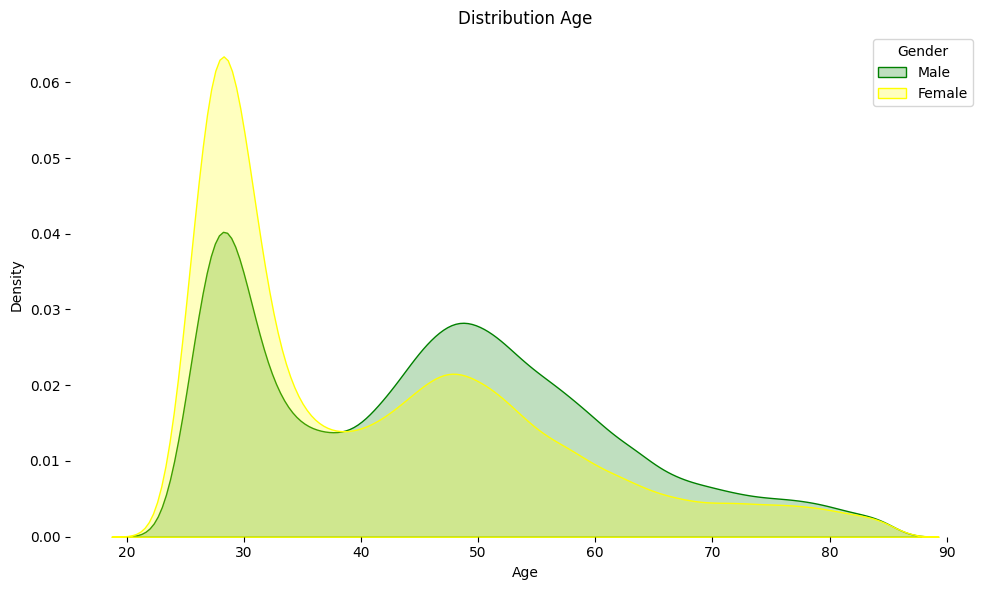

In [ ]:
#plt.figure(figsize=(15,6))
fig, ax = plt.subplots(figsize = (10,6))
sns.distplot(df.loc[df.Gender=='Male','Age'].dropna(),
            hist = False, color= 'green',
            kde_kws={'shade': True},
            ax = ax , label = 'Male')
sns.distplot(df.loc[df.Gender=='Female','Age'].dropna(),
            hist = False, color= 'yellow',
            kde_kws={'shade': True},
            ax = ax , label = 'Female')
ax.set_title("Distribution Age")
ax.legend(title = 'Gender')
# # Remove the spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tight_layout()
plt.show()

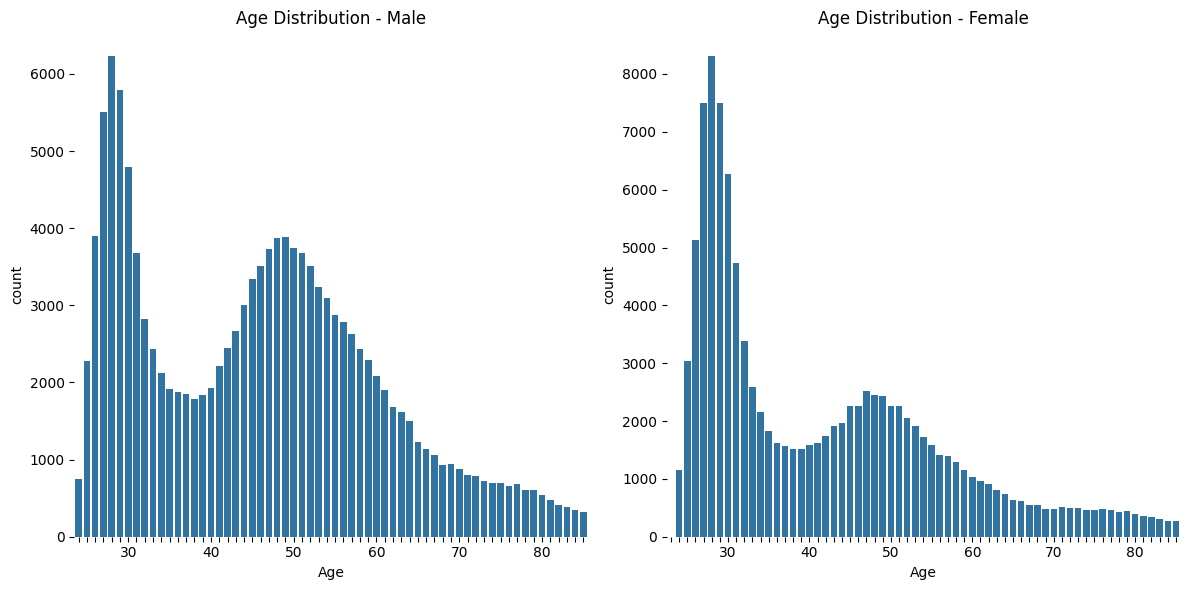

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Male
sns.countplot(x=df.loc[df.Gender=='Male', 'Age'], ax=ax[0])
ax[0].set_title('Age Distribution - Male')

# Plot for Female
sns.countplot(x=df.loc[df.Gender=='Female', 'Age'], ax=ax[1])
ax[1].set_title('Age Distribution - Female')

# Adjust the x-tick labels visibility for both plots
for a in ax:
    for age, label in enumerate(a.get_xticklabels()):
        if int(float(label.get_text())) % 10 == 0:
            label.set_visible(True)
        else:
            label.set_visible(False)

# Remove the spines for both plots
for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['bottom'].set_visible(False)
    a.spines['left'].set_visible(False)

# Ensure the layout fits the figure area
plt.tight_layout()

# Display the plots
plt.show()


2.5 Plot a pairplot for variables

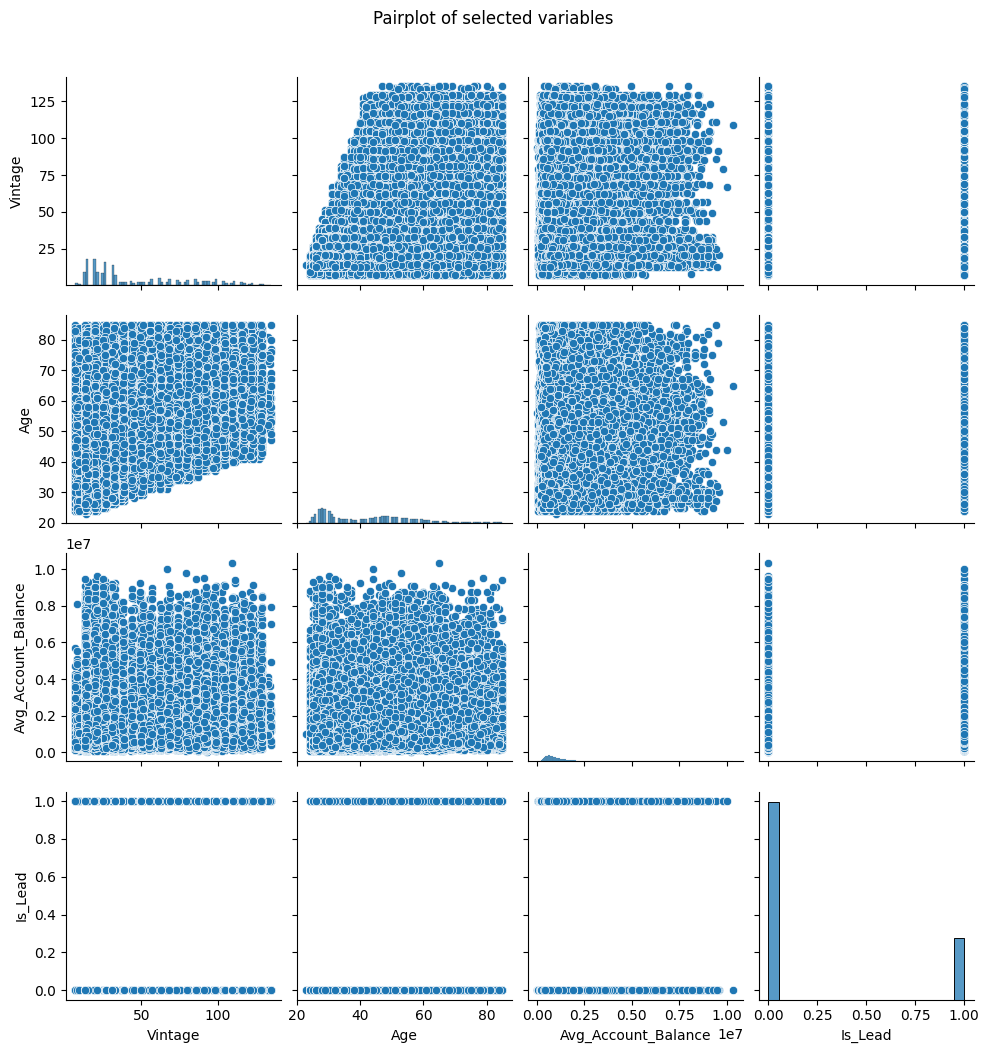

In [ ]:
pair_plot = sns.pairplot(df[[ 'Vintage','Age', 'Avg_Account_Balance', 'Is_Lead']] )
pair_plot.fig.suptitle('Pairplot of selected variables', y=1.05);

2.6 Correlation Heatmap

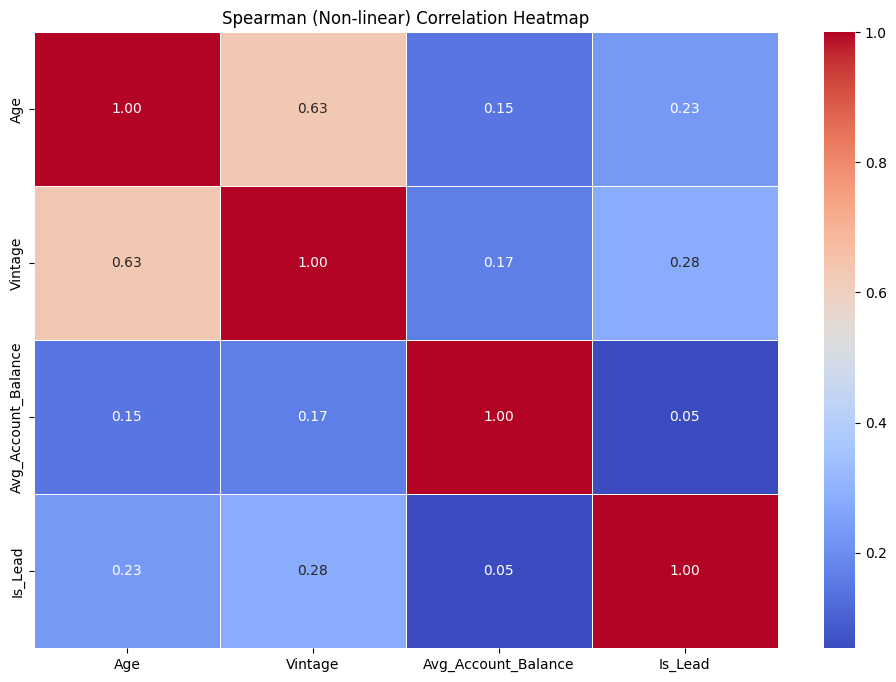

In [ ]:
# Compute the Pearson correlation matrix (linear correlation)
pearson_corr_matrix = df.select_dtypes(include='number').corr(method='pearson')



# Plot the Spearman (Non-linear, monotonic) correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Spearman (Non-linear) Correlation Heatmap')
plt.show()

2.7 Distribution of Vintage across different Occupation

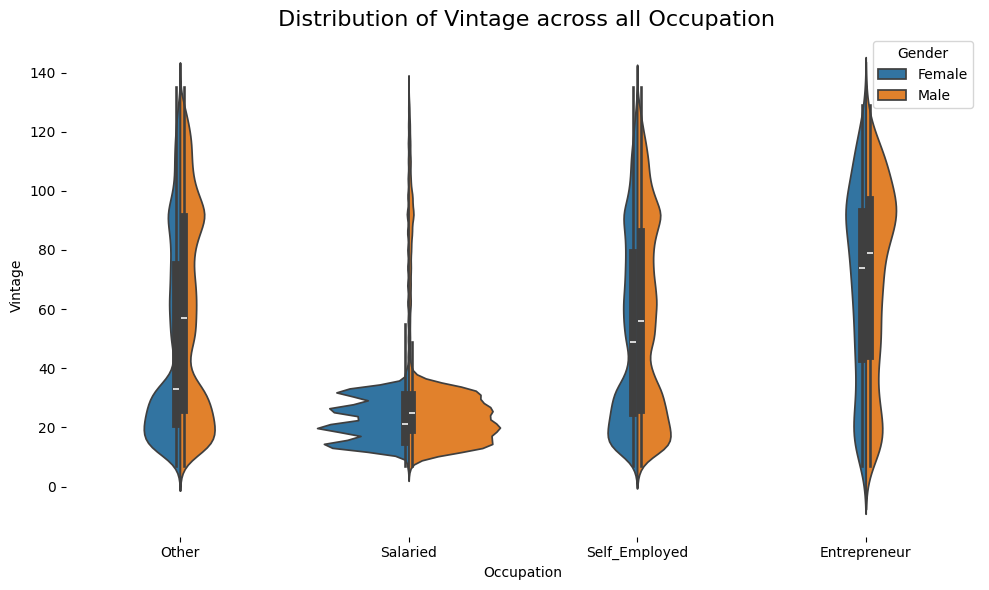

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.violinplot(x = 'Occupation' , y = 'Vintage',
                   hue = 'Gender', split = True, data = df)
ax.set_title(" Distribution of Vintage across all Occupation",
            fontsize = 16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tight_layout()
plt.show()

2.8 Purchase Rate Across different occupation

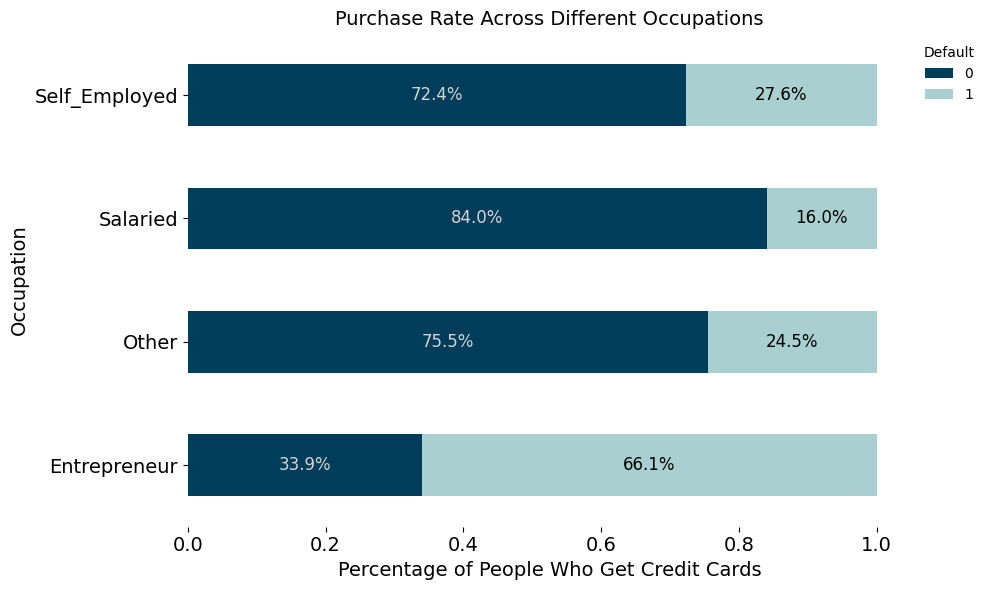

In [ ]:
# Compute the normalized counts (percentages)
normalized_counts = df.groupby('Occupation')['Is_Lead'].value_counts(normalize=True).unstack()

# Adjusting the colors to McKinsey tones (dark teal and light teal-blue)
mckinsey_colors = ['#003D5B', '#AACFD0']  # Dark teal and light teal-blue

# Create the horizontal bar plot
ax = normalized_counts.plot(kind='barh', stacked=True, figsize=(10, 6), color=mckinsey_colors)

# Set the title of the plot (with black font color)
ax.set_title("Purchase Rate Across Different Occupations", fontsize=14, color='black')
ax.legend(title='Default', bbox_to_anchor=(1, 1), frameon=False)

# Add x-axis label
ax.set_xlabel("Percentage of People Who Get Credit Cards", fontsize=14, color='black')
ax.set_ylabel("Occupation", fontsize=14, color='black')
# Remove the spines for a clean look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
# Adjust the ticks' font size for both x and y axis
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
# Add text annotations for the percentages inside the boxes
for bars, class_label in zip(ax.containers, [0, 1]):
    for bar in bars:
        width = bar.get_width()
        if width > 0:  # Only annotate bars with a positive width
            x = bar.get_x() + width / 2
            y = bar.get_y() + bar.get_height() / 2
            percentage = f'{width * 100:.1f}%'

            # Set font color based on class label
            font_color = 'lightgray' if class_label == 0 else 'black'
            ax.text(x, y, percentage, ha='center', va='center', color=font_color, fontsize=12)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


2.9 Distribution of age across occupation

<ipython-input-14-593dd5771827>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df.Occupation=='Other','Age'].dropna(),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-14-593dd5771827>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) 

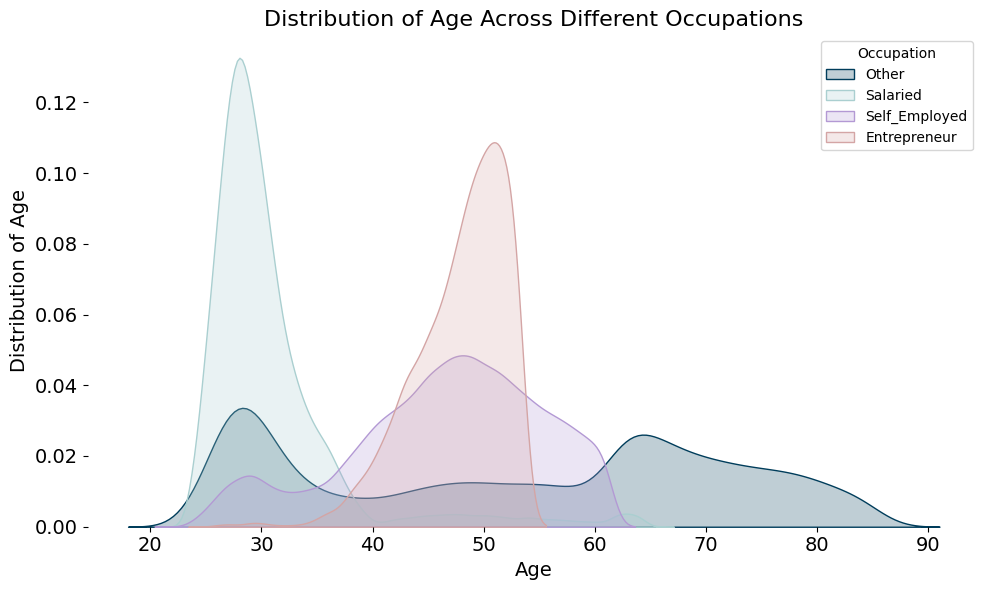

In [ ]:
#plt.figure(figsize=(15,6))
fig, ax = plt.subplots(figsize = (10,6))

# Adjusting colors to McKinsey-style muted tones
sns.distplot(df.loc[df.Occupation=='Other','Age'].dropna(),
            hist = False, color= '#003D5B',  # Dark teal
            kde_kws={'shade': True},
            ax = ax , label = 'Other')

sns.distplot(df.loc[df.Occupation=='Salaried','Age'].dropna(),
            hist = False, color= '#AACFD0',  # Light teal
            kde_kws={'shade': True},
            ax = ax , label = 'Salaried')

sns.distplot(df.loc[df.Occupation=='Self_Employed','Age'].dropna(),
            hist = False, color= '#B399D4',  # Muted purple
            kde_kws={'shade': True},
            ax = ax , label = 'Self_Employed')

sns.distplot(df.loc[df.Occupation=='Entrepreneur','Age'].dropna(),
            hist = False, color= '#D4A5A5',  # Muted pinkish
            kde_kws={'shade': True},
            ax = ax , label = 'Entrepreneur')

ax.set_title("Distribution of Age Across Different Occupations", color='black',fontsize = 16)
ax.set_xlabel("Age", fontsize=14, color='black')
ax.set_ylabel("Distribution of Age", fontsize=14, color='black')
ax.legend(title = 'Occupation')
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
# Remove the spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()


2.11 Credit Product predicting credit card intention

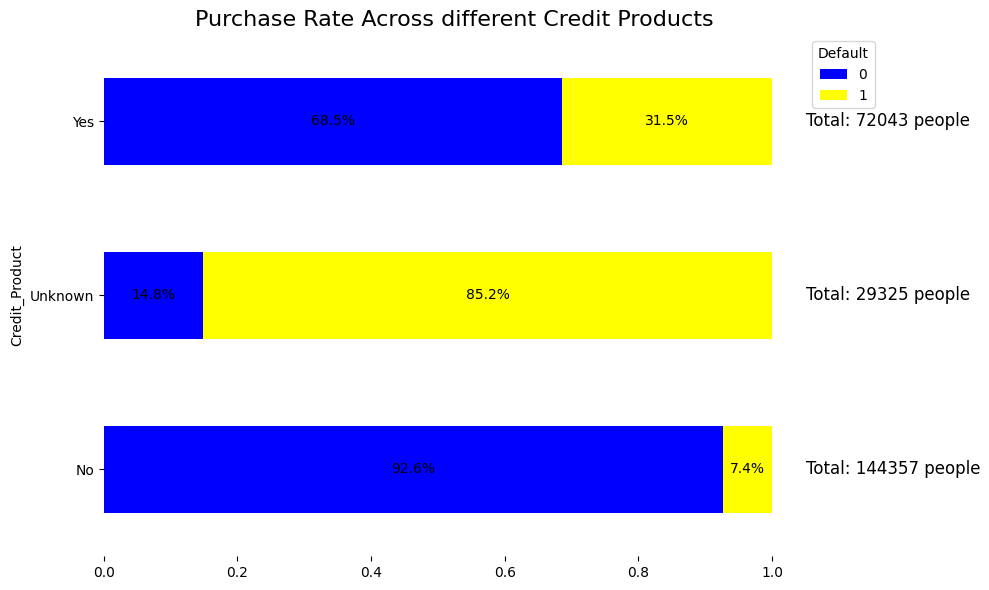

In [ ]:
normalized_counts = df.groupby('Credit_Product')['Is_Lead'].value_counts(normalize=True).unstack()

# Calculate total number of people for each Credit_Product category
total_counts = df['Credit_Product'].value_counts()

# Create the horizontal bar plot
ax = normalized_counts.plot(kind='barh', stacked=True, figsize=(10, 6), color=['blue', 'yellow'])

# Set the title of the plot
ax.set_title("Purchase Rate Across different Credit Products", fontsize=16)
ax.legend(title='Default', bbox_to_anchor=(1, 1))

# Remove the spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add text annotations for the percentages only (without raw counts)
for i, bars in enumerate(ax.containers):
    for j, bar in enumerate(bars):
        width = bar.get_width()
        if width > 0:  # Only annotate bars with a positive width
            x = bar.get_x() + width / 2
            y = bar.get_y() + bar.get_height() / 2
            percentage = f'{width * 100:.1f}%'

            # Only show percentage
            ax.text(x, y, f'{percentage}', ha='center', va='center', color='black')

# Add total number of people at the right side of each bar
for j, bar in enumerate(ax.patches[::2]):  # Iterate over the bars and add the totals
    total = total_counts.iloc[j]
    ax.text(1.05, bar.get_y() + bar.get_height()/2, f'Total: {total} people', va='center', fontsize=12)

# Adjust the layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

2.11 Distribution of Vintage across different credit product

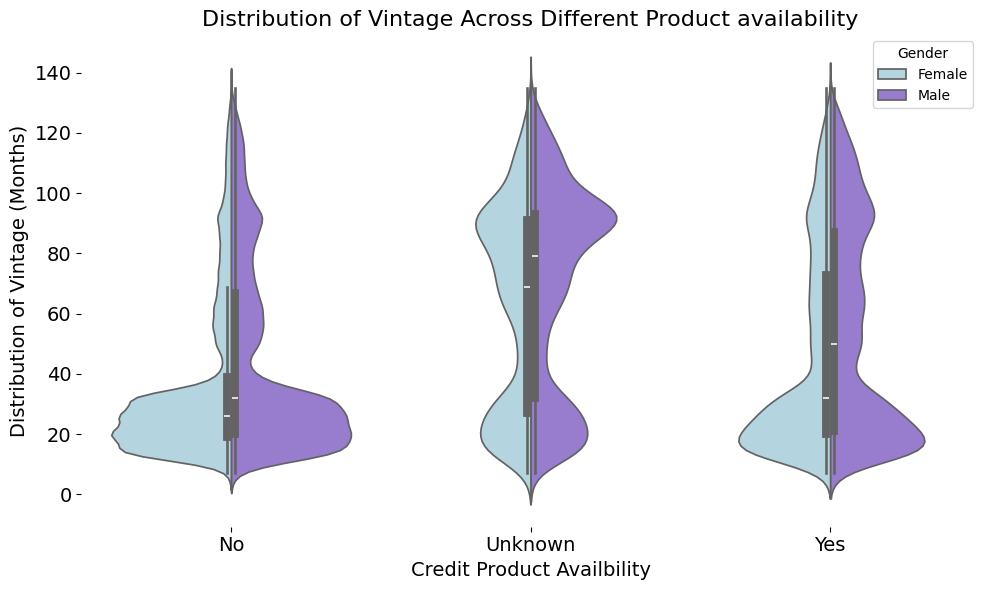

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjusting the colors to light blue and purple
mckinsey_colors = {
    'Female': '#ADD8E6',  # Light blue for female
    'Male': '#9370DB'     # Purple for male
}

# Calculate the purchase rate for each category
purchase_rate = df.groupby('Credit_Product')['Is_Lead'].mean() * 100

# Create the violin plot with light blue and purple
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x='Credit_Product', y='Vintage', hue='Gender', split=True, data=df,
                    palette=[mckinsey_colors['Female'], mckinsey_colors['Male']])

# Set the title of the plot
ax.set_title("Distribution of Vintage Across Different Product availability", fontsize=16)

# Remove spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xlabel("Credit Product Availbility", fontsize=14, color='black')
ax.set_ylabel("Distribution of Vintage (Months)", fontsize=14, color='black')
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
# # Add purchase rate annotations to the plot
# for i, category in enumerate(purchase_rate.index):
#     rate = f'{purchase_rate[category]:.1f}%'
#     ax.text(i, 150, rate, ha='center', va='center', fontsize=12, color='black', fontweight='bold')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


## 3. Data Splitting and Preprocessing

3.1 Only Taking 5% of the dataset

In [7]:
# Import train_test_split to split the data
from sklearn.model_selection import train_test_split

# Define the size of the subset to extract
portion_size = 0.2

# Split data into a small subset and discard the rest, preserving class distribution
X_portion, _, Y_portion, _ = train_test_split(X, Y, test_size=(1 - portion_size), stratify=Y, random_state=42)

# Print the shape of the extracted subset
print("Shape of X_portion:", X_portion.shape)
print("Shape of Y_portion:", Y_portion.shape)

# Check class distribution in the subset
print("Class distribution in Y_portion:\n", Y_portion.value_counts(normalize=True))


Shape of X_portion: (49145, 9)
Shape of Y_portion: (49145, 1)
Class distribution in Y_portion:
 Is_Lead
0          0.762784
1          0.237216
Name: proportion, dtype: float64


In [9]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

# Define the feature sets for different transformations
Min_Max_Feature = ['Age', 'Vintage']
Standardize_Feature = ['Avg_Account_Balance']
One_Hot_Feature = X_portion.columns.difference(['Age', 'Vintage', 'Avg_Account_Balance'])

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), One_Hot_Feature),
        ('minmax', MinMaxScaler(), Min_Max_Feature),
        ('std', StandardScaler(), Standardize_Feature)
    ])

# Create the pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor)])

X_Temp_Other, X_Temp_Test, y_Temp_Other, y_Temp_Test = train_test_split(X_portion, Y_portion, test_size=0.2, stratify=Y_portion, random_state=42)
X_Temp_Train, X_Temp_Val, y_Temp_Train, y_Temp_Val = train_test_split(X_Temp_Other, y_Temp_Other, test_size=0.25, stratify=y_Temp_Other, random_state=42)

# # Fit and transform the training data
X_Temp_train_prep = clf.fit_transform(X_Temp_Train)
X_Temp_val_prep = clf.transform(X_Temp_Val)
X_Temp_test_prep = clf.transform(X_Temp_Test)

# Get the feature names for each step
onehot_feature_names = clf.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(One_Hot_Feature)
minmax_feature_names = Min_Max_Feature
standardize_feature_names = Standardize_Feature

# Combine all feature names
all_feature_names = list(onehot_feature_names) + minmax_feature_names + standardize_feature_names

len(all_feature_names)

53

## 4. Training the Model and Parameter Tunning

4.1 Random Forest

In [11]:
#from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.pipeline import make_pipeline

# Define feature groups
Min_Max_Feature = ['Age', 'Vintage']
Standardize_Feature = ['Avg_Account_Balance']
One_Hot_Feature = X_portion.columns.difference(['Age', 'Vintage', 'Avg_Account_Balance'])

# Create the preprocessor
preprocessor = ColumnTransformer(
transformers=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), One_Hot_Feature),
    ('minmax', MinMaxScaler(), Min_Max_Feature),
    ('std', StandardScaler(), Standardize_Feature)
]
)

# Correct parameter grid for RandomForestClassifier in the pipeline
param_grid = {

'randomforestclassifier__max_depth': [1,3, 5, 10, 30, 100],
'randomforestclassifier__max_features': [0.25, 0.5,0.75,1.0],
#'randomforestclassifier__min_samples_leaf': [2, 4]

}

# Define random states for reproducibility
random_states = [0, 42, 123, 2023, 789]
RF_Score = []
RF_Final_Model = []
for rs in random_states:
  X_other, X_test, y_other, y_test = train_test_split(X_portion, Y_portion, test_size=0.2, stratify=Y_portion, random_state=rs)
  kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=rs)

  # Initialize Random Forest Classifier
  clf = RandomForestClassifier(random_state=rs)

  # Create the pipeline
  pipe = make_pipeline(preprocessor, clf)

  # Perform grid search with cross-validation
  grid = GridSearchCV(pipe, param_grid=param_grid, scoring='precision', cv=kf, return_train_score=True, n_jobs=-1)
  grid.fit(X_other, y_other)

  # Save and print results
  results_RF = pd.DataFrame(grid.cv_results_)
  print('\nBest model parameters:', grid.best_params_)
  print('Validation score:', grid.best_score_)

  # Save the final model and compute test score
  RF_Final_Model.append(grid)
  y_test_pred = RF_Final_Model[-1].predict(X_test)
  test_score = precision_score(y_test, y_test_pred)
  RF_Score.append(test_score)
  print('Test score:', test_score)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Best model parameters: {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 0.5}
Validation score: 0.8558434019523845
Test score: 0.8519660755589823


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Best model parameters: {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 0.75}
Validation score: 0.8548974683428943
Test score: 0.8535080956052429


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Best model parameters: {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 0.5}
Validation score: 0.8565109284703366
Test score: 0.8600469116497264


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Best model parameters: {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 1.0}
Validation score: 0.8553243507543831
Test score: 0.853448275862069


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Best model parameters: {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 1.0}
Validation score: 0.857227016913929
Test score: 0.8435754189944135


4.2 SVM

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.pipeline import make_pipeline
import pandas as pd

# Define feature groups
Min_Max_Feature = ['Age', 'Vintage']
Standardize_Feature = ['Avg_Account_Balance']
One_Hot_Feature = X.columns.difference(['Age', 'Vintage', 'Avg_Account_Balance'])

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), One_Hot_Feature),
        ('minmax', MinMaxScaler(), Min_Max_Feature),
        ('std', StandardScaler(), Standardize_Feature)
    ]
)

# Correct parameter grid for SVM in the pipeline
param_grid = {
    'svc__C': [1e-2, 1e-1, 1e0, 1e1, 1e2],
    'svc__gamma': [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]
}
SVM_Score = []
SVM_Final_Model = []

for rs in random_states:
  X_other, X_test, y_other, y_test = train_test_split(X_portion, Y_portion, test_size=0.2, stratify=Y_portion, random_state=rs)
  kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=rs)

  # Initialize SVM Classifier
  clf = SVC(random_state=rs)

  # Create the pipeline
  pipe = make_pipeline(preprocessor, clf)

  # Perform grid search with cross-validation
  grid = GridSearchCV(pipe, param_grid=param_grid, scoring='precision', cv=kf, return_train_score=True, n_jobs=-1)
  grid.fit(X_other, y_other)

  # Save and print results
  results_SVM = pd.DataFrame(grid.cv_results_)
  print('\nBest model parameters:', grid.best_params_)
  print('Validation score:', grid.best_score_)

  # Save the final model and compute test score
  SVM_Final_Model.append(grid)
  y_test_pred = SVM_Final_Model[-1].predict(X_test)
  test_score = precision_score(y_test, y_test_pred)
  SVM_Score.append(test_score)
  print('Test score:', test_score)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Best model parameters: {'svc__C': 0.1, 'svc__gamma': 0.1}
Validation score: 0.8521297565415757
Test score: 0.8455008488964346


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Best model parameters: {'svc__C': 0.1, 'svc__gamma': 0.1}
Validation score: 0.8504126577579727
Test score: 0.8530405405405406


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Best model parameters: {'svc__C': 1.0, 'svc__gamma': 0.01}
Validation score: 0.8507308368179112
Test score: 0.8503401360544217


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Best model parameters: {'svc__C': 0.1, 'svc__gamma': 0.1}
Validation score: 0.8509073020972632
Test score: 0.8510078878177038


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Best model parameters: {'svc__C': 0.1, 'svc__gamma': 0.1}
Validation score: 0.8537400960775458
Test score: 0.8399653979238755


4.3 XGB

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, ParameterGrid
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

# Define the preprocessor (adjust according to your dataset)
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), One_Hot_Feature),
        ('scaler', StandardScaler(), Standardize_Feature),
        ('minmax', MinMaxScaler(), Min_Max_Feature)
    ]
)

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [10000],
    'max_depth': [1,3,5,10,30,100],
    'learning_rate': [0.1],
    'reg_lambda': [0e0, 1e-1, 1e0, 1e1, 1e2],  # L2 regularization
    'reg_alpha': [0e0, 1e-1, 1e0, 1e1, 1e2],   # L1 regularization
    'subsample':[0.66],
    'colsample_bytree':[0.9]
}

# Number of random states for experimentation
nr_states = [0, 42, 123, 2023, 789]

# Results storage
xgb_test_scores = []
xgb_final_models = []

# Loop through random states
for rs in nr_states:
    # Train-test split with stratification
    X_other, X_test, y_other, y_test = train_test_split(
        X_portion, Y_portion, test_size=0.2, stratify=Y_portion, random_state=rs
    )

    # Initialize Stratified K-Fold
    kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=rs)

    best_model = None
    best_val_score = -np.inf
    best_params = None

    # Perform stratified K-fold cross-validation
    for train_idx, val_idx in kf.split(X_other, y_other):
        # Create train and validation splits
        X_train, X_val = X_other.iloc[train_idx], X_other.iloc[val_idx]
        y_train, y_val = y_other.iloc[train_idx], y_other.iloc[val_idx]

        # Preprocess data
        X_train_prep = preprocessor.fit_transform(X_train)
        X_val_prep = preprocessor.transform(X_val)
        X_test_prep = preprocessor.transform(X_test)

        # Iterate through parameter grid
        for params in ParameterGrid(param_grid_xgb):
            # Initialize XGBoost classifier
            clf = xgb.XGBClassifier(
                eval_metric='logloss',
                random_state=rs,
                n_jobs=-1
            )

            # Set parameters and early stopping
            clf.set_params(**params, early_stopping_rounds=100)

            # Fit the model with early stopping
            clf.fit(
                X_train_prep,
                y_train,
                eval_set=[(X_val_prep, y_val)],
                verbose=False
            )

            # Evaluate on validation set
            y_val_pred = clf.predict(X_val_prep)
            val_score = precision_score(y_val, y_val_pred)

            # Update best model if current model performs better
            if val_score > best_val_score:
                best_val_score = val_score
                best_model = clf
                best_params = params

    # Evaluate on test set using the best model
    y_test_pred = best_model.predict(X_test_prep)
    test_score = precision_score(y_test, y_test_pred)

    # Store results
    xgb_test_scores.append(test_score)
    xgb_final_models.append(best_model)

    # Print results for this random state
    print("\nRandom State:", rs)
    print("Best Parameters:", best_params)
    print("Best Validation Accuracy:", best_val_score)
    print("Test Accuracy:", test_score)

# # Summary of results
# print("\nSummary of Test Scores Across Random States:")
# print(xgb_test_scores)
# print("Mean Test Accuracy:", np.mean(xgb_test_scores))
# print("Standard Deviation of Test Accuracy:", np.std(xgb_test_scores))



Random State: 0
Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 10000, 'reg_alpha': 100.0, 'reg_lambda': 100.0, 'subsample': 0.66}
Best Validation Accuracy: 0.8537313432835821
Test Accuracy: 0.8280542986425339

Random State: 42
Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 10000, 'reg_alpha': 100.0, 'reg_lambda': 100.0, 'subsample': 0.66}
Best Validation Accuracy: 0.8591885441527446
Test Accuracy: 0.8440438871473355

Random State: 123
Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 10000, 'reg_alpha': 100.0, 'reg_lambda': 100.0, 'subsample': 0.66}
Best Validation Accuracy: 0.8485558157689306
Test Accuracy: 0.8411719352351581

Random State: 2023
Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 10000, 'reg_alpha': 100.0, 'reg_lambda': 10.0, 'subsample': 0.66}
Best Validation Accuracy: 0.863226

4.4 KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
Min_Max_Feature = ['Age', 'Vintage']
Standardize_Feature = ['Avg_Account_Balance']
One_Hot_Feature = X_portion.columns.difference(['Age', 'Vintage', 'Avg_Account_Balance'])

# Create the preprocessor
preprocessor = ColumnTransformer(
transformers=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), One_Hot_Feature),
    ('minmax', MinMaxScaler(), Min_Max_Feature),
    ('std', StandardScaler(), Standardize_Feature)
]
)
# Correct parameter grid for KNN in the pipeline
param_grid_knn = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7],
    'kneighborsclassifier__metric': ['euclidean', 'manhattan']
}
KNN_Score = []
KNN_Final_Model = []

for rs in random_states:
    X_other, X_test, y_other, y_test = train_test_split(
        X_portion, Y_portion, test_size=0.2, stratify=Y_portion, random_state=rs
    )
    kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=rs)

    # Initialize KNN Classifier
    clf = KNeighborsClassifier()

    # Create the pipeline
    pipe = make_pipeline(preprocessor, clf)

    # Perform grid search with cross-validation
    grid = GridSearchCV(pipe, param_grid=param_grid_knn, scoring='precision', cv=kf, return_train_score=True, n_jobs=-1)
    grid.fit(X_other, y_other)

    # Save and print results
    results_KNN = pd.DataFrame(grid.cv_results_)
    print('\nBest model parameters (KNN):', grid.best_params_)
    print('Validation score (KNN):', grid.best_score_)

    # Save the final model and compute test score
    KNN_Final_Model.append(grid)
    y_test_pred = KNN_Final_Model[-1].predict(X_test)
    test_score = precision_score(y_test, y_test_pred)
    KNN_Score.append(test_score)
    print('Test score (KNN):', test_score)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Best model parameters (KNN): {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 7}
Validation score (KNN): 0.7158812559555472
Test score (KNN): 0.7255234861346915


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Best model parameters (KNN): {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 7}
Validation score (KNN): 0.7210167951748458
Test score (KNN): 0.7157246782316732


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Best model parameters (KNN): {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 7}
Validation score (KNN): 0.724626155015813
Test score (KNN): 0.7206295671725689


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Best model parameters (KNN): {'kneighborsclassifier__metric': 'euclidean', 'kneighborsclassifier__n_neighbors': 7}
Validation score (KNN): 0.7173985276774165
Test score (KNN): 0.703599550056243


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Best model parameters (KNN): {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 7}
Validation score (KNN): 0.7245966765591004
Test score (KNN): 0.7213695395513577


4.5 Logistics Regression

In [18]:
from sklearn.linear_model import LogisticRegression
Min_Max_Feature = ['Age', 'Vintage']
Standardize_Feature = ['Avg_Account_Balance']
One_Hot_Feature = X_portion.columns.difference(['Age', 'Vintage', 'Avg_Account_Balance'])

# Create the preprocessor
preprocessor = ColumnTransformer(
transformers=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), One_Hot_Feature),
    ('minmax', MinMaxScaler(), Min_Max_Feature),
    ('std', StandardScaler(), Standardize_Feature)
]
)
# Correct parameter grid for Logistic Regression in the pipeline
param_grid_lr = {
    'logisticregression__C': [0.01, 0.1, 1, 10,100],
    'logisticregression__penalty': ['l1', 'l2']
}
LR_Score = []
LR_Final_Model = []

for rs in random_states:
    X_other, X_test, y_other, y_test = train_test_split(
        X_portion, Y_portion, test_size=0.2, stratify=Y_portion, random_state=rs
    )
    kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=rs)

    # Initialize Logistic Regression Classifier
    clf = LogisticRegression(max_iter=1000, random_state=rs)

    # Create the pipeline
    pipe = make_pipeline(preprocessor, clf)

    # Perform grid search with cross-validation
    grid = GridSearchCV(pipe, param_grid=param_grid_lr, scoring='precision', cv=kf, return_train_score=True, n_jobs=-1)
    grid.fit(X_other, y_other)

    # Save and print results
    results_LR = pd.DataFrame(grid.cv_results_)
    print('\nBest model parameters (Logistic Regression):', grid.best_params_)
    print('Validation score (Logistic Regression):', grid.best_score_)

    # Save the final model and compute test score
    LR_Final_Model.append(grid)
    y_test_pred = LR_Final_Model[-1].predict(X_test)
    test_score = precision_score(y_test, y_test_pred)
    LR_Score.append(test_score)
    print('Test score (Logistic Regression):', test_score)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/pyth


Best model parameters (Logistic Regression): {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2'}
Validation score (Logistic Regression): 0.842662234130411
Test score (Logistic Regression): 0.8358895705521472


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/pyth


Best model parameters (Logistic Regression): {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2'}
Validation score (Logistic Regression): 0.8410802910659754
Test score (Logistic Regression): 0.8300304878048781


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/pyth


Best model parameters (Logistic Regression): {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2'}
Validation score (Logistic Regression): 0.8434168196267967
Test score (Logistic Regression): 0.8367816091954023


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/pyth


Best model parameters (Logistic Regression): {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2'}
Validation score (Logistic Regression): 0.8407350764743947
Test score (Logistic Regression): 0.8359133126934984


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/pyth


Best model parameters (Logistic Regression): {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l2'}
Validation score (Logistic Regression): 0.8446948799052112
Test score (Logistic Regression): 0.8268330733229329


### 5. Compare Accuracy with Baseline

In [ ]:
# Count actual positives
actual_positives = df['Is_Lead'].sum()  # Sum of all rows where Is_Lead = 1

# Total predictions (assume all are positive in baseline model)
total_predictions = len(df)

# Compute baseline precision
baseline_precision = actual_positives / total_predictions
print("Baseline Precision:", baseline_precision)


Baseline Precision: 0.23720826126767727


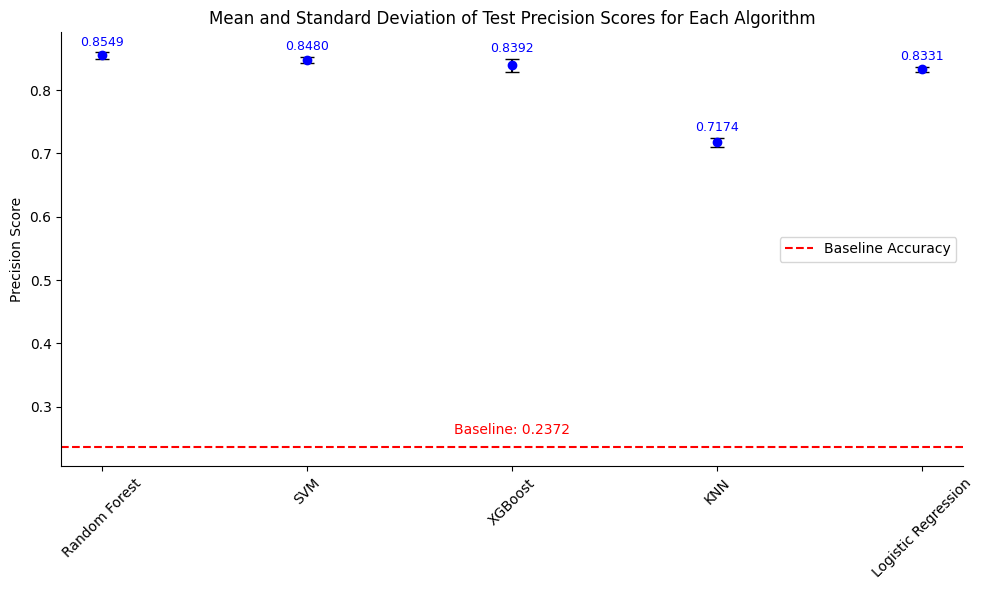

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Example scores dictionary
scores_dict = {
    'Random Forest': RF_Score,
    'SVM': SVM_Score,
    'XGBoost': xgb_test_scores,
    'KNN': KNN_Score,
    'Logistic Regression': LR_Score
}

# Calculate means and standard deviations
model_names = []
means = []
std_devs = []

print("Average scores and standard deviations:")
for model, scores in scores_dict.items():
    model_names.append(model)
    mean_score = np.mean(scores)
    std_dev = np.std(scores)
    means.append(mean_score)
    std_devs.append(std_dev)
    print(f"{model}: Mean = {mean_score:.4f}, Std Dev = {std_dev:.4f}")


# Plotting the graph
fig, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(model_names, means, yerr=std_devs, fmt='o', capsize=5, color='blue', ecolor='black', elinewidth=1, markersize=8)

# Annotate mean scores on the plot with adjusted position to avoid overlapping with bars
for i, (x, y) in enumerate(zip(model_names, means)):
    ax.text(i + 0.2, y + 0, f'{y:.4f}', color='blue', ha='center', fontsize=10)

# Add baseline accuracy as a dashed line
ax.axhline(y=baseline_precision, color='red', linestyle='--', linewidth=1.5, label='Baseline Accuracy')

# Annotate baseline accuracy score on top of the line
ax.text(
    len(model_names) / 2,  # Centered horizontally
    baseline_precision + 0.01,  # Slightly above the red dashed line
    f"Baseline: {baseline_precision:.4f}",
    color='red',
    fontsize=12,
    ha='center',
    va='bottom'  # Align text to the bottom to ensure it appears above the line
)

# Add legend
ax.legend()

# Set labels and title
ax.set_ylabel('Accuracy Score')
ax.set_xlabel('Algorithm')
ax.set_title('Mean and Standard Deviation of Test Precision Scores for Each Algorithm')
ax.set_xticks(range(len(model_names)))
ax.set_xticklabels(model_names, rotation=45)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

# Save the figure BEFORE showing it
plt.savefig("Performance of Algorithm.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


## 6. Model Insepection Random Forest

In [11]:
def get_best_model(models, scores):
    """
    Selects the best model based on the highest score.

    Parameters:
        models (list): List of models for a specific algorithm.
        scores (list): List of scores corresponding to the models.

    Returns:
        best_model: The best estimator with the highest score.
    """
    best_index = np.argmax(scores)
    return models[best_index].best_estimator_


In [12]:
RF_Best_Model = get_best_model(RF_Final_Model,RF_Score)

In [36]:
X_other, X_test, y_other, y_test = train_test_split(X_portion, Y_portion, test_size=0.2, stratify=Y_portion, random_state=123)

6.1 Confusion Matrix

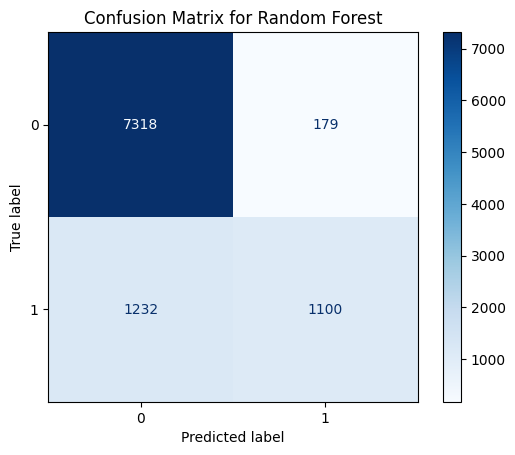

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_test_pred = RF_Best_Model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title(f"Confusion Matrix for Random Forest")
plt.savefig("Confusion Matrix.png", dpi=300, bbox_inches='tight')
plt.show()

In [38]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)

# Recall
recall = TP / (TP + FN)

# F1 score
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)

Precision: 0.8600469116497264
Recall: 0.4716981132075472
F1 Score: 0.6092495153697037
Accuracy: 0.8564452131447756


6.2 Global Importance

## Gini Importance

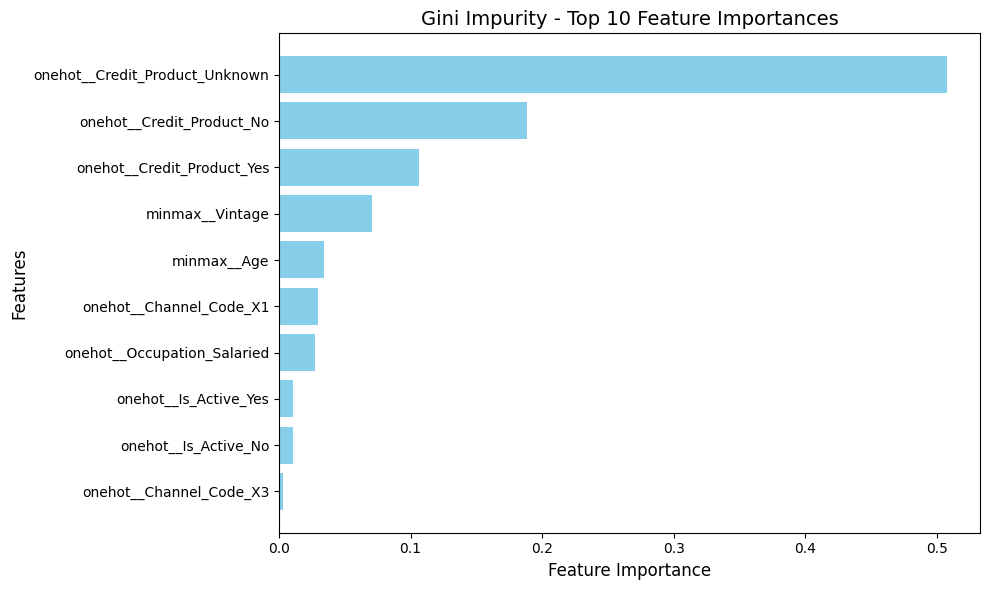

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the trained RandomForestClassifier
rf_model = RF_Best_Model.named_steps['randomforestclassifier']

# Extract the feature names from the ColumnTransformer
preprocessor = RF_Best_Model.named_steps['columntransformer']
feature_names = preprocessor.get_feature_names_out()

# Extract Gini importances from the RandomForestClassifier
feature_importances = rf_model.feature_importances_

# Combine feature names with their importances
sorted_importances = sorted(
    zip(feature_names, feature_importances),
    key=lambda x: x[1],  # Sort by importance values
    reverse=True         # Descending order
)

# Extract the top 10 features and their importances
top_10_features = sorted_importances[:10]  # Get the first 10 items
feature_names_top_10 = [x[0] for x in top_10_features]  # Extract feature names
feature_importances_top_10 = [x[1] for x in top_10_features]  # Extract feature importances

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_names_top_10, feature_importances_top_10, color='skyblue')  # Horizontal bar plot
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Gini Impurity - Top 10 Feature Importances', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.tight_layout()
plt.savefig("Top_10_Gini_Importance.png", dpi=300, bbox_inches='tight')  # Save the plot
plt.show()


shuffling Gender
   shuffled test score: 0.472 +/- 0.0
shuffling Age
   shuffled test score: 0.469 +/- 0.001
shuffling Region_Code
   shuffled test score: 0.472 +/- 0.0
shuffling Occupation
   shuffled test score: 0.529 +/- 0.006
shuffling Channel_Code
   shuffled test score: 0.473 +/- 0.0
shuffling Vintage
   shuffled test score: 0.467 +/- 0.002
shuffling Credit_Product
   shuffled test score: 0.181 +/- 0.007
shuffling Avg_Account_Balance
   shuffled test score: 0.472 +/- 0.0
shuffling Is_Active
   shuffled test score: 0.471 +/- 0.001


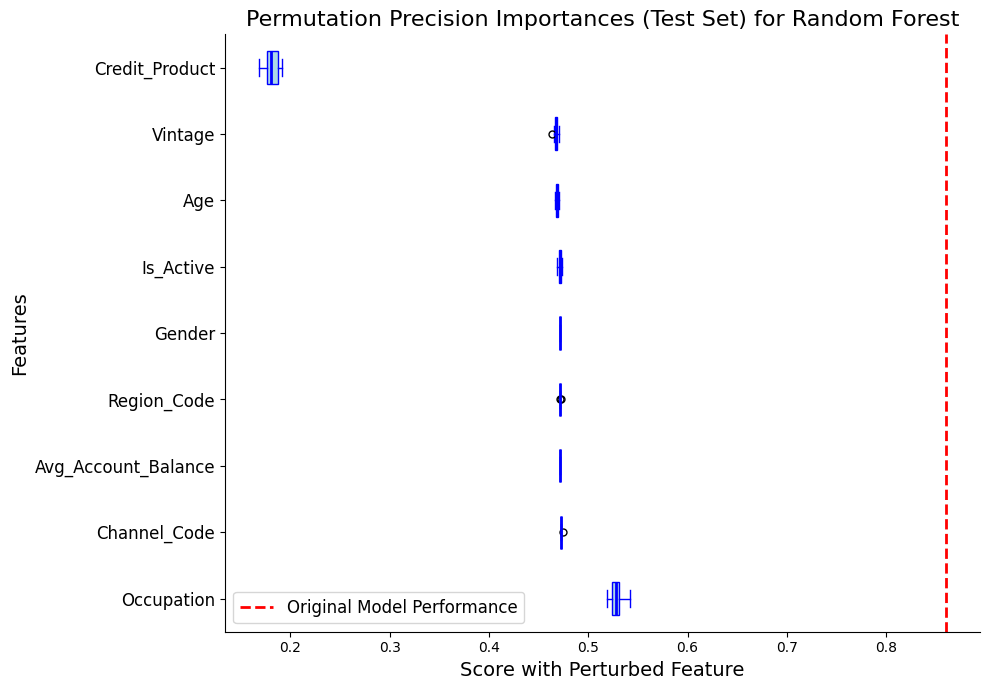

In [39]:
Feature_Name = X_test.columns

scores = np.zeros([len(Feature_Name),10])
# loop through the features
for i in range(len(Feature_Name)):
    print('shuffling '+str(Feature_Name[i]))
    acc_scores = []
    for j in range(10):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[Feature_Name[i]] = np.random.permutation(X_test[Feature_Name[i]].values)
        y_pred = RF_Best_Model.predict(X_test_shuffled)
        acc_scores.append(precision_score(y_pred,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores
sorted_inds = np.argsort(np.mean(scores, axis=1))[::-1]

# Create the boxplot
fig, ax = plt.subplots(figsize=(10, 7))  # Using `ax` for spine adjustments
box = ax.boxplot(
    scores[sorted_inds].T,
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor="lightblue", color="blue"),  # Blue box color
    medianprops=dict(color="blue", linewidth=2),         # Blue median line
    whiskerprops=dict(color="blue"),                     # Blue whiskers
    capprops=dict(color="blue"),                         # Blue caps
    flierprops=dict(marker="o", color="blue", markersize=5),  # Blue outliers
)

# Add tick labels for features
ax.set_yticks(np.arange(1, len(sorted_inds) + 1))
ax.set_yticklabels(np.array(Feature_Name)[sorted_inds], fontsize=12)

# Add a vertical line indicating the test score
ax.axvline(
    precision,
    label="Original Model Performance",
    color="red",
    linestyle="--",
    linewidth=2,
)

# Titles and labels
ax.set_title(f"Permutation Precision Importances (Test Set) for Random Forest", fontsize=16)
ax.set_xlabel("Score with Perturbed Feature", fontsize=14)
ax.set_ylabel("Features", fontsize=14)

# Remove top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Add legend
ax.legend(fontsize=12, loc="lower left")

# Adjust layout for a cleaner look
plt.tight_layout()
# Show the plot
plt.savefig("Importance of Feature.png", dpi=300, bbox_inches='tight')
plt.show()

6.2 Local Feature Importance

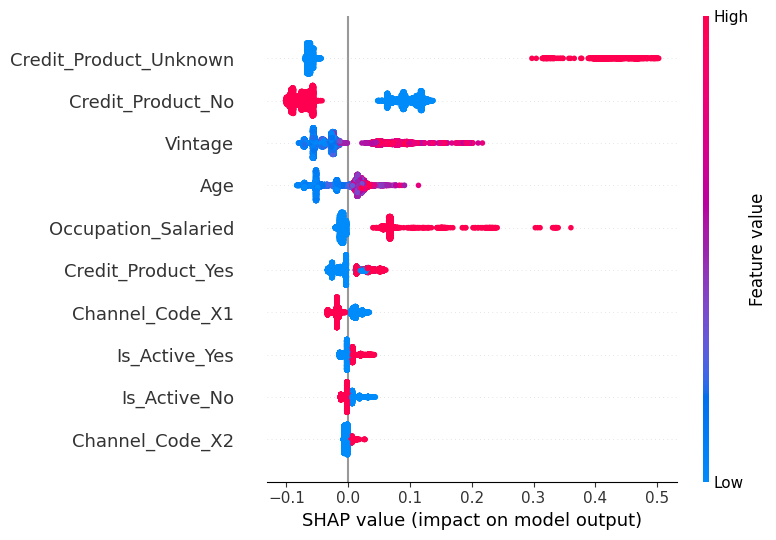

<Figure size 640x480 with 0 Axes>

In [41]:
import shap
X_test_prep = RF_Best_Model.named_steps['columntransformer'].transform(X_test)

# Use TreeExplainer directly on the final random forest model
rf_model = RF_Best_Model.named_steps['randomforestclassifier']
explainer = shap.TreeExplainer(rf_model)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_prep)

# If binary classification, select the positive class shap values
shap_summary_values = shap_values[:, :, 1]  # assuming shap_values is a list of arrays

shap.summary_plot(shap_summary_values, X_test_prep, feature_names=all_feature_names, max_display=10)
plt.savefig("shap_summary_plot.png", dpi=300, bbox_inches='tight')

In [ ]:
shap.initjs()

# Index of the prediction
Class_0_Prediction_Index = 0

# Get SHAP values for the single instance
row_shap_values = shap_summary_values[Class_0_Prediction_Index, :]

# Obtain the feature values and names for the instance
feature_values = X_test_prep[Class_0_Prediction_Index]
feature_names = all_feature_names  # Assuming all_feature_names contains the feature names

# Obtain the expected value for the chosen class (if binary classification: explainer.expected_value[1])
expected_value = explainer.expected_value[1] if isinstance(explainer.expected_value, (list, np.ndarray)) else explainer.expected_value

# Plot the force plot for this single sample
shap.force_plot(
    expected_value,
    row_shap_values,
    feature_values,
    feature_names=feature_names,
)

In [42]:
import shap
import numpy as np

shap.initjs()

# Index of the prediction
Class_0_Prediction_Index = 5

# Get SHAP values for the single instance
row_shap_values = shap_summary_values[Class_0_Prediction_Index, :]

# Obtain the feature values and names for the instance
feature_values = X_test_prep[Class_0_Prediction_Index]
feature_names = all_feature_names  # Assuming all_feature_names contains the feature names

# Identify the indices of the 5 least important features (by absolute SHAP values)
least5_idx = np.argsort(np.abs(row_shap_values))[:8]

# Subset SHAP values, feature values, and feature names for the least important features
row_shap_values_least5 = row_shap_values[least5_idx]
feature_values_least5 = feature_values[least5_idx]
feature_names_least5 = np.array(feature_names)[least5_idx]

# Obtain the expected value for the chosen class (if binary classification: explainer.expected_value[1])
expected_value = explainer.expected_value[1] if isinstance(explainer.expected_value, (list, np.ndarray)) else explainer.expected_value

# Plot the force plot for the least important features
shap.force_plot(
    expected_value,
    row_shap_values_least5,
    feature_values_least5,
    feature_names=feature_names_least5,

)


In [43]:
import numpy as np
import shap

shap.initjs()

Class_0_Prediction_Index = 5
# Get SHAP values for that single instance
row_shap_values = shap_summary_values[Class_0_Prediction_Index, :]

# Identify the top 5 features with the highest absolute SHAP values
top_features_count = 5
top5_idx = np.argsort(np.abs(row_shap_values))[-top_features_count:]

# Subset SHAP values, feature values, and names to these top 5 features
row_shap_values_top5 = row_shap_values[top5_idx]
feature_values_top5 = X_test_prep[Class_0_Prediction_Index, top5_idx]
feature_names_top5 = np.array(all_feature_names)[top5_idx]

# Obtain the expected value for the chosen class (if binary: explainer.expected_value[1])
expected_value = explainer.expected_value[1] if isinstance(explainer.expected_value, (list, np.ndarray)) else explainer.expected_value

# Plot the force plot for this single sample and top 5 features
shap.force_plot(
    expected_value,
    row_shap_values_top5,
    feature_values_top5,
    feature_names=feature_names_top5,
)


In [53]:
import numpy as np
import shap

shap.initjs()

Class_1_Prediction_Index = 28
# Get SHAP values for that single instance
row_shap_values = shap_summary_values[Class_1_Prediction_Index, :]

# Identify the top 5 features with the highest absolute SHAP values
top_features_count = 6
top5_idx = np.argsort(np.abs(row_shap_values))[-top_features_count:]

# Subset SHAP values, feature values, and names to these top 5 features
row_shap_values_top5 = row_shap_values[top5_idx]
feature_values_top5 = X_test_prep[Class_1_Prediction_Index, top5_idx]
feature_names_top5 = np.array(all_feature_names)[top5_idx]

# Obtain the expected value for the chosen class (if binary: explainer.expected_value[1])
expected_value = explainer.expected_value[1] if isinstance(explainer.expected_value, (list, np.ndarray)) else explainer.expected_value

# Plot the force plot for this single sample and top 5 features
shap.force_plot(
    expected_value,
    row_shap_values_top5,
    feature_values_top5,
    feature_names=feature_names_top5,
)


In [56]:
import shap
import numpy as np

shap.initjs()

Class_1_Prediction_Index = 28

row_shap_values = shap_summary_values[Class_1_Prediction_Index, :]

feature_values = X_test_prep[Class_1_Prediction_Index]
feature_names = all_feature_names


least5_idx = np.argsort(np.abs(row_shap_values))[:7]


row_shap_values_least5 = row_shap_values[least5_idx]
feature_values_least5 = feature_values[least5_idx]
feature_names_least5 = np.array(feature_names)[least5_idx]


expected_value = explainer.expected_value[1] if isinstance(explainer.expected_value, (list, np.ndarray)) else explainer.expected_value


shap.force_plot(
    expected_value,
    row_shap_values_least5,
    feature_values_least5,
    feature_names=feature_names_least5,

)
